In [37]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ipywidgets import interact, IntSlider, Button

# Keras functions
from keras.models import Sequential
from keras.layers import Dense,Activation,Input,concatenate, add
from keras.optimizers import SGD , Adam
from keras.models import Model

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import tensorflow as tf

from keras.backend import set_session
import os

def create_session(gpu_id='0', pp_mem_frac=None):

    tf.reset_default_graph()
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id # can multiple?
    with tf.device('/gpu:' + gpu_id):
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        if pp_mem_frac is not None:
            config.gpu_options.per_process_gpu_memory_fraction=pp_mem_frac
        session = tf.Session(config = config)
    return session
gpu_id = '0'
sess = create_session(gpu_id)
set_session(sess)

## 讀取 MNIST 手寫辨識資料

In [39]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [40]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [41]:
y_train=np_utils.to_categorical(y_train,10) 
y_test=np_utils.to_categorical(y_test,10)

## Normalize該資料

In [42]:
#規一化
x_train-=x_train.min()
x_train=x_train/x_train.max()
x_test-=x_test.min()
x_test=x_test/x_test.max()

In [43]:
#定義input
x = Input(shape=(784,))

In [44]:
print(x)

Tensor("input_1:0", shape=(?, 784), dtype=float32)


## 做Function API的部分

In [45]:
f_0 = Dense(300,activation='relu') #784 -> 300

f_1 = Dense(150,activation='sigmoid') #300 -> 150
f_2 = Dense(150,activation='sigmoid') #300 -> 150 
f_3 = Dense(150,activation='sigmoid') #300 -> 150 

f_4 = Dense(50,activation='relu') #150 -> 50 
f_5 = Dense(50,activation='relu') #150 -> 50 
f_6 = Dense(50,activation='relu') #150 -> 50 

f_7 = Dense(20,activation='relu') #50 -> 20 

f_8 = Dense(10,activation='softmax') #20-> 10 

In [46]:
#把上面做出來的連接起來
h_0 = f_0(x) 

h_1 = f_1(h_0) 
h_2 = f_2(h_0) 
h_3 = f_3(h_0)

h_4 = f_4(h_1)
h_5 = f_5(h_1)
z_6 = concatenate([h_2, h_3])
h_6=f_6(z_6)

z_7 = concatenate([h_4,h_5, h_6]) 

h_7 = f_7(z_7)

y = f_8(h_7)

## 看看製作出來模型的結構

In [47]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 300)          235500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 150)          45150       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 150)          45150       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (D

## 用圖片看看我設計的Function API是怎麽樣子
![image](funtion_api.png)

## Compile 我做的模型 然後去訓練

In [49]:
model.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.1),metrics=['accuracy'])

In [51]:
my_model = model.fit(x_train, y_train, batch_size=120, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2997 - acc: 0.9012
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1930 - acc: 0.9273
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1092 - acc: 0.9629: 1s - loss: 0.
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0809 - acc: 0.9730
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0682 - acc: 0.9776: 0s - loss: 0.0685 - acc: 0.
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0593 - acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0523 - acc: 0.9830
Epoch 8/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0467 - acc: 0.9850
Epoch 9/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0421 - acc: 0.9866
Epoch 10/20
60000/60000 [==============================]

## 算出來準確率跟Loss

In [52]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 44us/step
loss: 0.021124352006893606
正確率 0.9927300003051758


## 畫出來看看準確率

<function matplotlib.pyplot.show(*args, **kw)>

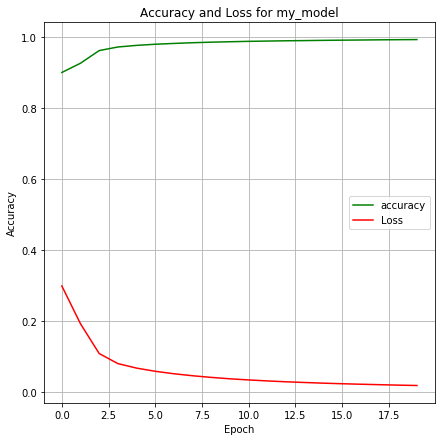

In [80]:
plt.figure(figsize=(7,7))
plt.plot(my_model.history['acc'], 'g')
plt.title('Accuracy and Loss for my_model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(my_model.history['loss'], 'r')
plt.grid()
plt.legend(["accuracy" , "Loss"],loc = 0)
plt.show